In [ ]:
install.packages("gridExtra")
install.packages("lattice")
install.packages("caret")
install.packages("kableExtra")

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(knitr)
library(gridExtra)
library(lattice)
library(caret)
library(kableExtra)
library(reshape2)
#library(dict)
library(data.table)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'data.table'

The following objects are masked from 'package:reshape2':

    dcast, melt

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The followin

In [2]:
Customers <- read.csv(("data/olist_customers_dataset.csv"), header = TRUE)
Geolocation <- read.csv("data/olist_geolocation_dataset.csv", header = TRUE)
Items <- read.csv(("data/olist_order_items_dataset.csv"), header = TRUE)
Payments <- read.csv("data/olist_order_payments_dataset.csv", header = TRUE)
Reviews <- read.csv("data/olist_order_reviews_dataset.csv", header = TRUE)
Orders <- read.csv("data/olist_orders_dataset.csv", header = TRUE)
Products <- read.csv("data/olist_products_dataset.csv", header = TRUE)
Sellers <- read.csv("data/olist_sellers_dataset.csv", header = TRUE)
Pdttrans <- read.csv("data/product_category_name_translation.csv", header = TRUE)

### Les catégories des produits les plus référencés 

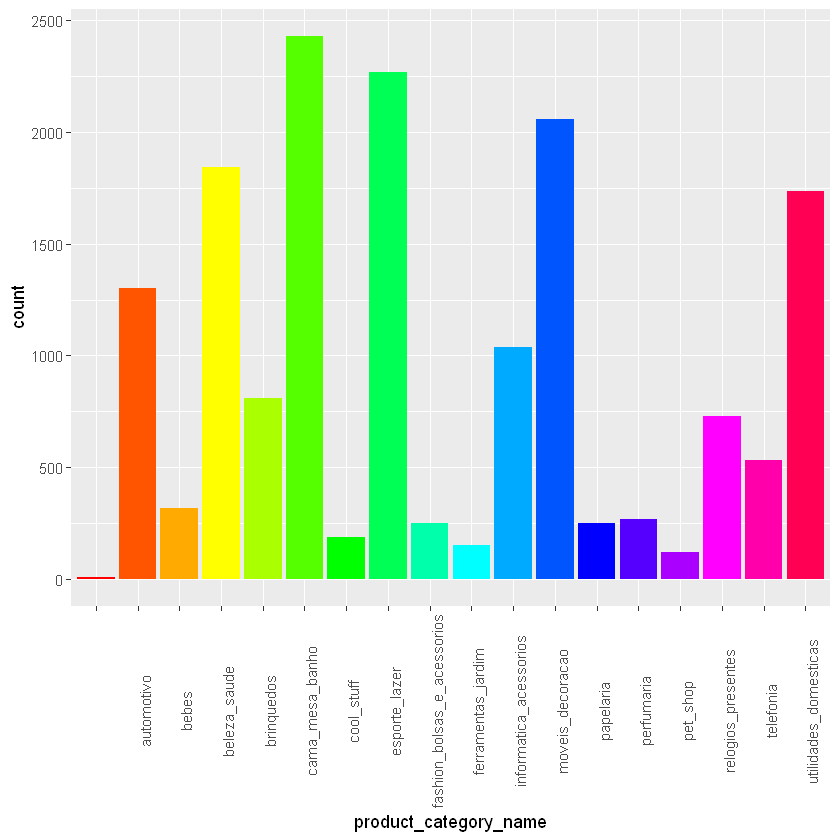

In [6]:
 Products_cats <- Products %>%
      filter(!is.na(product_category_name)) %>%
      group_by(product_category_name) %>%
      filter(row_number() > 600)
      # 18 fait référence au 18 histo
Products_cats %>% ggplot(aes(x = product_category_name)) + geom_bar(fill = rainbow(n=18)) + theme(axis.text.x = element_text(angle = 90))

In [8]:
colnames(Products_cats)

[1] "product_id"                 "product_category_name"     
[3] "product_name_lenght"        "product_description_lenght"
[5] "product_photos_qty"         "product_weight_g"          
[7] "product_length_cm"          "product_height_cm"         
[9] "product_width_cm"

In [36]:
OrdersItems <-merge(Items,Orders,by.x="order_id",by.y="order_id")
OrdersItemsCustorder<-merge(OrdersItems,Customers,by.x="customer_id",by.y="customer_id")
OrdersItemsCustorderProduct <-merge(OrdersItemsCustorder,Products,by.x="product_id",by.y="product_id")
OrdersItemsCustorderProductReviews <-merge(OrdersItemsCustorderProduct,Reviews,by.x="order_id",by.y="order_id")

### Les utilisateurs qui achètent A catégorie achètent aussi B,C,D catégories

Définition de la fonction qui permet de trouver les catégories communes entre utilisateurs

In [145]:
get_common_cats <- function(category_name, except_cats) {
    OrItCustPrdctCat_i <- OrdersItemsCustorderProduct %>% 
                                 filter(product_category_name == category_name)
                                 
    OrItCustPrdctCat_custids_i <- OrItCustPrdctCat_i$customer_unique_id
    custids_commons <- vector()
    custids_common_selected <- vector()
    category_selected <- ""
    custids <- vector()
    for (j in 1:length(categories))
        {
          if (category_name != toString(categories[j]) && !(toString(categories[j]) %in% except_cats))
              {
                   OrItCustPrdctCat_j <- OrdersItemsCustorderProduct %>% 
                                 filter(product_category_name == toString(categories[j]))
              
                   OrItCustPrdctCat_custids_j <- OrItCustPrdctCat_j$customer_unique_id
                   
                   custids_common = intersect(OrItCustPrdctCat_custids_i,OrItCustPrdctCat_custids_j)
                   if (length(custids_common_selected) < length(custids_common))
                       {
                        custids_common_selected <- custids_common
                        category_selected <- toString(categories[j])
                        custids <- OrItCustPrdctCat_custids_j
                       }
              }
        }
    return(list(category_selected,custids_common_selected,OrItCustPrdctCat_custids_i))
}

In [146]:
unique(Products_cats$product_category_name)

[1] cama_mesa_banho             esporte_lazer              
 [3] moveis_decoracao            beleza_saude               
 [5] utilidades_domesticas       automotivo                 
 [7] informatica_acessorios      brinquedos                 
 [9] relogios_presentes          telefonia                  
[11] bebes                       papelaria                  
[13] perfumaria                  fashion_bolsas_e_acessorios
[15] cool_stuff                  ferramentas_jardim         
[17] pet_shop                                               
74 Levels:  agro_industria_e_comercio alimentos alimentos_bebidas ... utilidades_domesticas

 Les utilisateurs qui achètent **cama_mesa_banho** achètent aussi souvent  **moveis_decoracao**, **utilidades_domesticas**,**bebes**

In [147]:
cama_mesa_banho_1 <- get_common_cats("cama_mesa_banho",list("cama_mesa_banho"))
cama_mesa_banho_2 <- get_common_cats("cama_mesa_banho",list("moveis_decoracao"))
cama_mesa_banho_3 <- get_common_cats("cama_mesa_banho",list("moveis_decoracao","utilidades_domesticas"))

In [153]:
total <- lengths(cama_mesa_banho_1[2]) + lengths(cama_mesa_banho_2[2]) + lengths(cama_mesa_banho_3[2])
moveis_decoracao_ <- (lengths(cama_mesa_banho_1[2])*100)/total #60 %
utilidades_domesticas_ <- (lengths(cama_mesa_banho_2[2])*100)/total #25.76923
bebes_ <- (lengths(cama_mesa_banho_3[2])*100)/total #14.23077

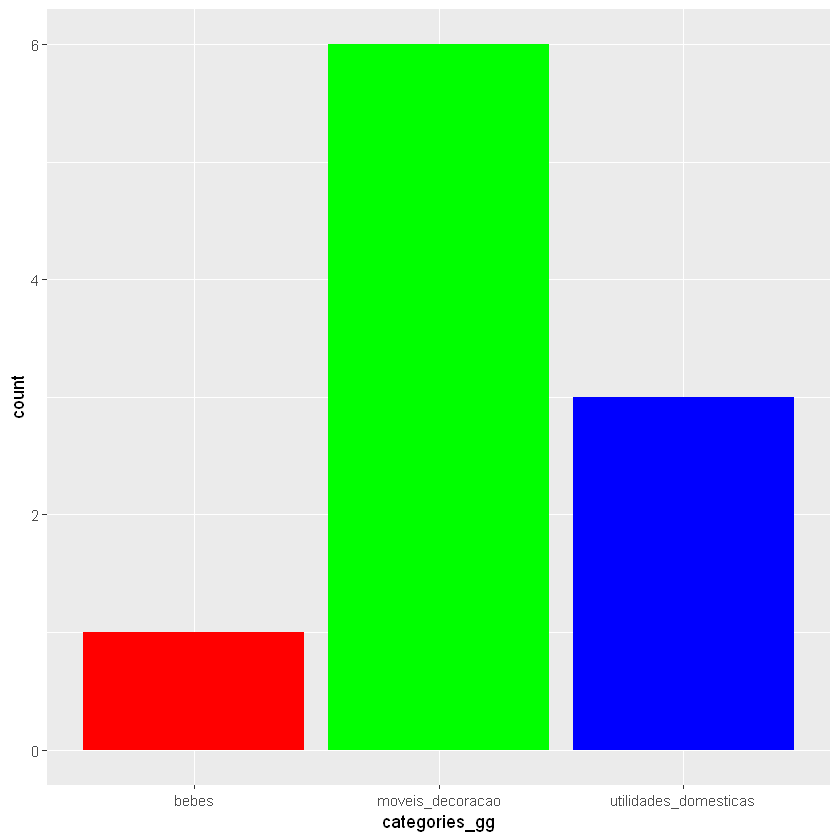

In [152]:
categories_gg <- c("moveis_decoracao", "moveis_decoracao",  "moveis_decoracao", "moveis_decoracao", "moveis_decoracao", "moveis_decoracao", "utilidades_domesticas", "utilidades_domesticas", "utilidades_domesticas", "bebes")
ggplot(data.frame(categories_gg), aes(x=categories_gg)) + geom_bar(fill = rainbow(n=3))

 Les utilisateurs qui achètent **cool_stuff** achètent aussi souvent  **bebes**, **cama_mesa_banho**,**moveis_decoracao**

In [155]:
cool_stuff_1 <- get_common_cats("cool_stuff",list("cool_stuff"))
cool_stuff_2 <- get_common_cats("cool_stuff",list("bebes"))
cool_stuff_3 <- get_common_cats("cool_stuff",list("cama_mesa_banho","bebes"))
print(cool_stuff_3[1])

[[1]]
[1] "moveis_decoracao"



In [157]:
total_2 <- lengths(cool_stuff_1[2]) + lengths(cool_stuff_2[2]) + lengths(cool_stuff_3[2])
#cool_stuff_ <- (lengths(cool_stuff_1[3])*100)/total_2 #45.58824
bebes_1 <- (lengths(cool_stuff_1[2])*100)/total_2 #45.58824 %
print(bebes_1)
cama_mesa_banho_1 <- (lengths(cool_stuff_2[2])*100)/total_2 #33.82353
print(cama_mesa_banho_1)
moveis_decoracao_1 <- (lengths(cool_stuff_3[2])*100)/total_2 #20.58824
print(moveis_decoracao_1)

[1] 45.58824
[1] 33.82353
[1] 20.58824


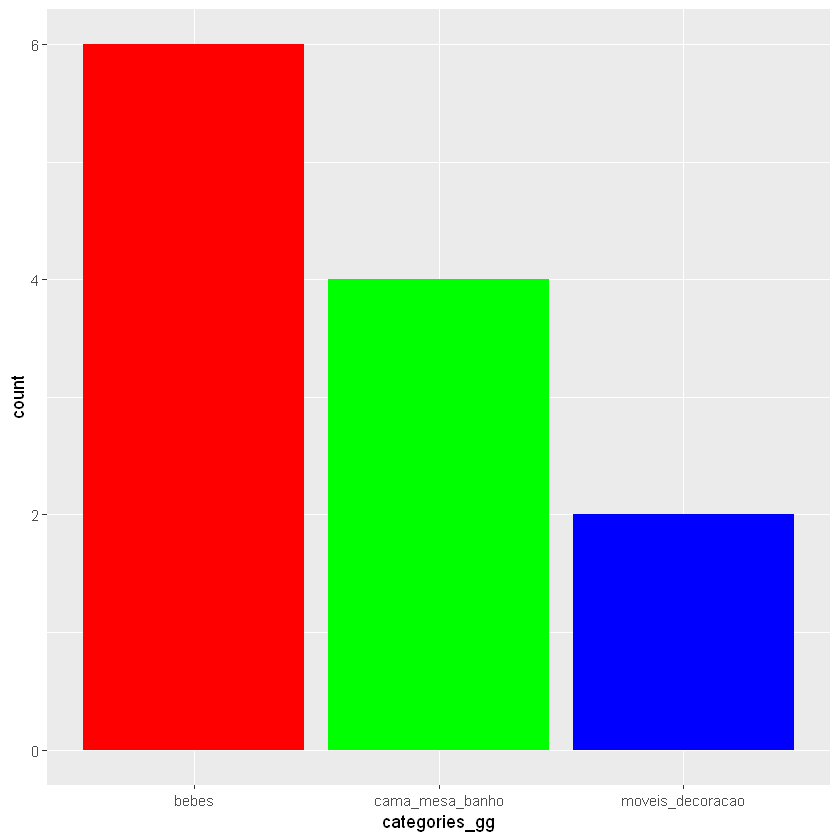

In [159]:
categories_gg <- c("bebes", "bebes",  "bebes", "bebes", "bebes", "bebes", "cama_mesa_banho", "cama_mesa_banho", "cama_mesa_banho", "cama_mesa_banho","moveis_decoracao","moveis_decoracao")
ggplot(data.frame(categories_gg), aes(x=categories_gg)) + geom_bar(fill = rainbow(n=3))

In [50]:
colnames(OrdersItemsCustorderProduct)

[1] "product_id"                    "customer_id"                  
 [3] "order_id"                      "order_item_id"                
 [5] "seller_id"                     "shipping_limit_date"          
 [7] "price"                         "freight_value"                
 [9] "order_status"                  "order_purchase_timestamp"     
[11] "order_approved_at"             "order_delivered_carrier_date" 
[13] "order_delivered_customer_date" "order_estimated_delivery_date"
[15] "customer_unique_id"            "customer_zip_code_prefix"     
[17] "customer_city"                 "customer_state"               
[19] "product_category_name"         "product_name_lenght"          
[21] "product_description_lenght"    "product_photos_qty"           
[23] "product_weight_g"              "product_length_cm"            
[25] "product_height_cm"             "product_width_cm"

### 